   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Var(setosa) = 0.1242, Var(versicolor) = 0.2664
Variance Ratio (F) = 2.1443, 

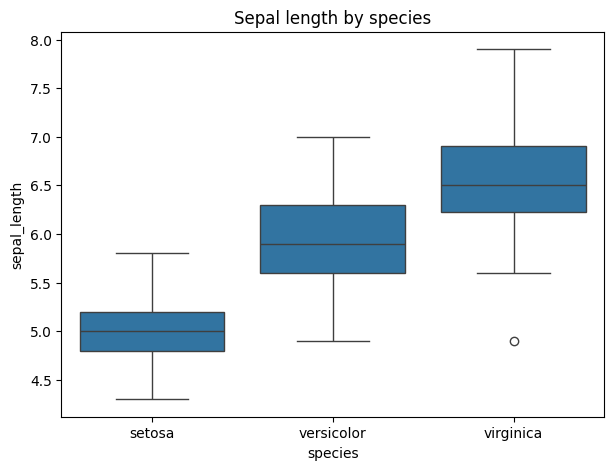

In [ ]:
# Option A: Use Iris CSV from the web (example uses a raw gist URL)
import pandas as pd
import numpy as np
from scipy.stats import f, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) Load dataset (raw gist URL)
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
# Read directly from URL into DataFrame
df = pd.read_csv(url)
# saving a local copy
df.to_csv("./data/iris_plant.csv", index=False)

# Explore the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Use variable: sepal_length; group by species
outcome = "sepal_length"
group_col = "species"

# --- 2) Two-group variance-ratio (example: setosa vs versicolor)
g1 = df[df[group_col] == "setosa"][outcome]
g2 = df[df[group_col] == "versicolor"][outcome]

# Sample variances
var1 = np.var(g1, ddof=1)
var2 = np.var(g2, ddof=1)
print(f"Var(setosa) = {var1:.4f}, Var(versicolor) = {var2:.4f}")

# Make F = larger/smaller
F_stat = var1 / var2 if var1 > var2 else var2 / var1
df1 = len(g1) - 1
df2 = len(g2) - 1

# two-sided p-value using F-distribution
p_two = 2 * min(f.cdf(F_stat, df1, df2), 1 - f.cdf(F_stat, df1, df2))
print(f"Variance Ratio (F) = {F_stat:.4f}, p-value (two-tailed) = {p_two:.4f}")

# Interpret at alpha = 0.05
alpha = 0.05
if p_two < alpha:
    print("Reject H0: variances differ significantly between these two species.")
else:
    print("Fail to reject H0: no evidence of different variances (at alpha=0.05).")

# --- 3) ANOVA across all three species (one-way)
groups = [grp[outcome].values for name, grp in df.groupby(group_col)]
F_anova, p_anova = f_oneway(*groups)
print(f"ANOVA F = {F_anova:.4f}, p = {p_anova:.4f}")
if p_anova < alpha:
    print("Reject H0: at least one species mean (sepal_length) differs.")
else:
    print("Fail to reject H0: no evidence of differing means across species.")

# --- 4) Quick boxplot to visualize spread
plt.figure(figsize=(7,5))
sns.boxplot(x=group_col, y=outcome, data=df)
plt.title("Sepal length by species")
plt.show()


#### 💭 Reflection

---



---

<br>
<br>
<br>

